In [1]:
#Dependenices
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numpy import linalg as la

In [2]:
#Variables
a = 2
b = 15
kappa = 2
T = 5
deltat = 1e-3
pi = np.pi

In [3]:
def u_true(x,t,a=2,b=15):
    
    ut = np.sin(b*x - a*t)
    
    return ut

def u_int(x,t=0,a=2,b=15):
    
    ut = np.sin(b*x - a*t)
    
    return ut

In [4]:
narr = np.array([20,40,80,120,240])
delxn = (b-a)/narr
#errarr = np.array([0,0,0,0,0])
tarr = np.arange(deltat, T+0.1*deltat, deltat)
tnum = len(tarr)
deltatarr = np.array([2.5,1,0.5,0.25,0.1])

In [5]:
t = sp.Symbol('t')
x = sp.Symbol('x')
ut = sp.sin(t*sp.sin(b*x - a*t))
f = sp.diff(sp.diff(ut,t),t) - kappa**2*sp.diff(sp.diff(ut,x),x)
func = sp.lambdify((x,t),f)

In [6]:
def num(narr,t,a=2,b=15,kappa=2,deltat=1e-3):
    
    err = np.zeros(len(narr))
    deltaxl = np.zeros(len(narr))
    
    for j in range(len(narr)):
        
        n = narr[j]
        deltax = (b-a)/n
        xlist = np.linspace(a,b,n+1)
        tlist = np.arange(deltat, t+0.1*deltat, deltat)
        tline = np.linspace(deltat, t, 100)
        ntlist = len(tlist)
    
        A = (kappa/(deltax**2))*(-2*np.diag(np.ones(n-1),k=0)+np.diag(np.ones(n-2),k=-1)+np.diag(np.ones(n-2),k=1))

        I = np.eye(n-1)
    
        def g(t):
        
            g = func(xlist[1:-1],t)
        
            return func(xlist[1:-1],t)
    
        def f(u,t):
        
            f = A.dot(u) + func(xlist[1:-1],t)
        
            return f
    
        uk = u_int(xlist[1:-1])
        tk = 0
        count = 0
    
        u = np.zeros((n-1,ntlist))
        ut = np.zeros((n-1,ntlist))
    
        for i in range(len(tlist)):
            tkp1 = tk+deltat
            ukp1 = la.solve((I-0.5*deltat*A), uk+0.5*deltat*(f(uk,tk)+g(tkp1)))
            uk = ukp1
            tk = tkp1
            if ((tkp1>tline[count])):
                u[:,count] = uk;
                ut[:,count] = u_true(xlist[1:-1], tkp1)
                count = count+1
        
        
        err[j] = la.norm(ukp1-u_true(xlist[1:-1],t))/la.norm(u_true(xlist[1:-1],t))
        deltaxl[j] = deltax
    
    return u,ut,xlist,err,deltaxl

In [7]:
u1,ut1,xl1,err,deltaxl = num(narr,T)

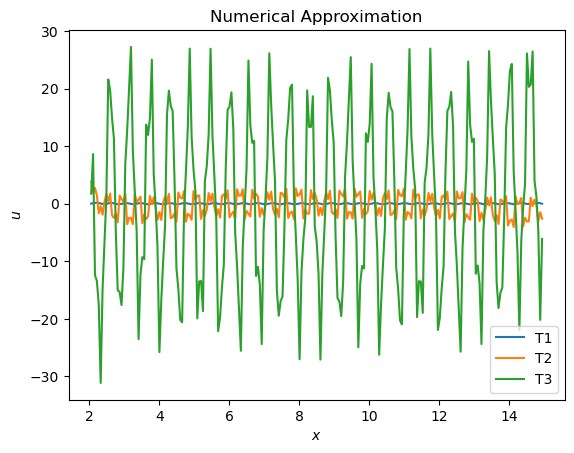

In [8]:
plt.plot(xl1[1:-1],u1[:,1],label='T1')
plt.plot(xl1[1:-1],u1[:,50],label='T2')
plt.plot(xl1[1:-1],u1[:,99],label='T3')
plt.title("Numerical Approximation")
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.legend()

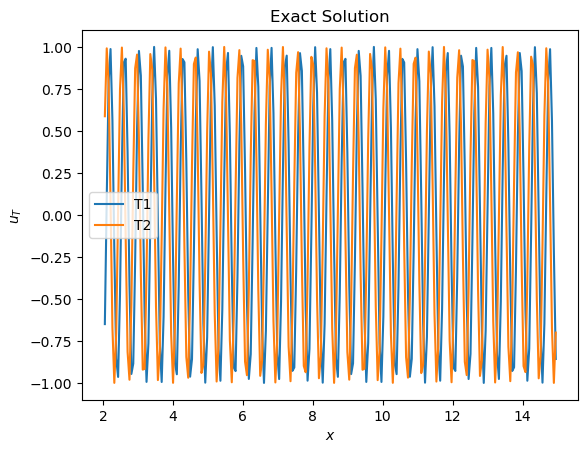

In [9]:
plt.plot(xl1[1:-1],ut1[:,1],label='T1')
plt.plot(xl1[1:-1],ut1[:,50],label='T2')
#plt.plot(xl1[1:-1],ut1[:,99],label='T3')
plt.title("Exact Solution")
plt.xlabel("$x$")
plt.ylabel("$u_T$")
plt.legend()

3b.)

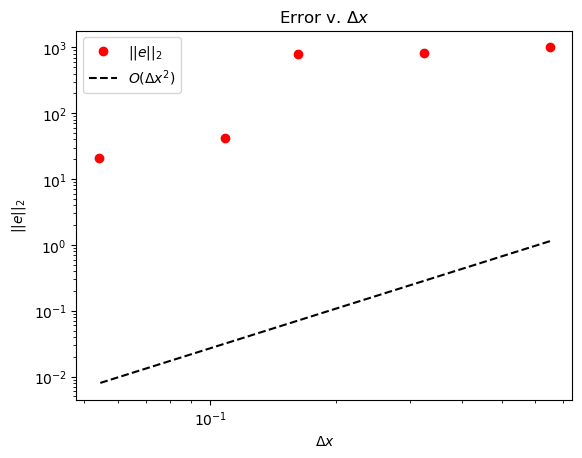

In [10]:
def order(x):
    
    order = 2.7*x**2
    
    return order

orderl = []

for i in deltaxl:
    
    orderl.append(order(i))

plt.plot(deltaxl,err,'ro',label='$||e||_2$')
plt.plot(deltaxl,orderl,'k--',label='$O( \Delta x^2)$')
plt.title("Error v. $\Delta x$ ")
plt.xlabel('$\Delta x$')
plt.ylabel('$||e||_2$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

4.)

In [11]:
def num2(n,t,deltatarr,a=2,b=15,kappa=2):
    
    err = np.zeros(len(deltatarr))
    deltatl = np.zeros(len(deltatarr))
    
    for j in range(len(deltatarr)):
        
        deltat = deltatarr[j]
        deltax = (b-a)/n
        xlist = np.linspace(a,b,n+1)
        tlist = np.arange(deltat, t+0.1*deltat, deltat)
        tline = np.linspace(deltat, t, 100)
        ntlist = len(tlist)
    
        A = (kappa/(deltax**2))*(-2*np.diag(np.ones(n-1),k=0)+np.diag(np.ones(n-2),k=-1)+np.diag(np.ones(n-2),k=1))

        I = np.eye(n-1)
    
        def g(t):
        
            g = func(xlist[1:-1],t)
        
            return func(xlist[1:-1],t)
    
        def f(u,t):
        
            f = A.dot(u) + func(xlist[1:-1],t)
        
            return f
    
        uk = u_int(xlist[1:-1])
        tk = 0
        count = 0
    
        u = np.zeros((n-1,ntlist))
        ut = np.zeros((n-1,ntlist))
    
        for i in range(len(tlist)):
            tkp1 = tk+deltat
            ukp1 = la.solve((I-0.5*deltat*A), uk+0.5*deltat*(f(uk,tk)+g(tkp1)))
            uk = ukp1
            tk = tkp1
            if ((tkp1>tline[count])):
                u[:,count] = uk;
                ut[:,count] = u_true(xlist[1:-1], tkp1)
                count = count+1
        
        
        err[j] = la.norm(ukp1-u_true(xlist[1:-1],t))/la.norm(u_true(xlist[1:-1],t))
        deltatl[j] = deltat
    
    return u,ut,xlist,err,deltatl

In [12]:
u2,ut2,xl2,err2,deltatl = num2(3000,T,deltatarr)

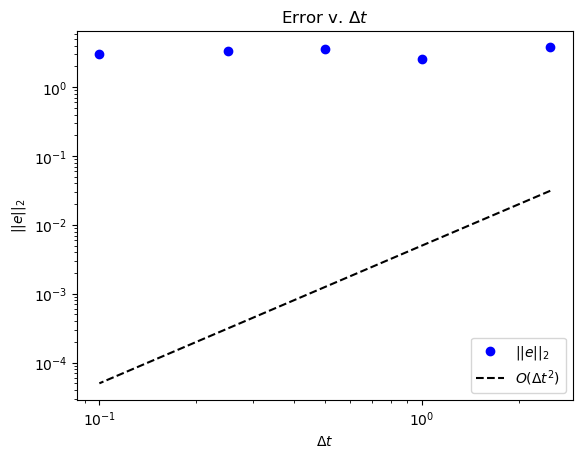

In [13]:
def order2(x):
    
    order = 0.005*x**2
    
    return order

order2l = []

for i in deltatl:
    
    order2l.append(order2(i))

plt.plot(deltatl,err2,'bo',label='$||e||_2$')
plt.plot(deltatl,order2l,'k--',label='$O( \Delta t^2)$')
plt.title("Error v. $\Delta t$ ")
plt.xlabel('$\Delta t$')
plt.ylabel('$||e||_2$')
plt.xscale('log')
plt.yscale('log')
plt.legend()